#### **Hypothesis for Off-Court Analysis**
Hypothesis: "Significant off-court events, such as legal issues, personal life changes, or public controversies, have a measurable impact on the on-court performance of NBA players. This impact may manifest as changes in key performance indicators such as Points Per Game (PPG), Assists Per Game (APG), Rebounds Per Game (RPG), and Field Goal Percentage (FG%)."  

Objective of the Analysis  
To quantitatively assess the influence of major off-court events on the on-court performance of NBA players. The analysis aims to compare players' performance metrics during seasons affected by significant off-court events to their baseline performance in other seasons.

#### Players Off Court Issues

Shaquille O'Neal - Focus on the 2007-2008 NBA season, aligning with his divorce filing.
Metrics: PPG, RPG, Blocks Per Game (BPG), Field Goal Percentage (FG%).

Kobe Bryant - Analyze the 2003-2004 NBA season, corresponding to his legal troubles.
Metrics: PPG, APG, RPG, FG%, Free Throw Percentage (FT%).

Derrick Rose - Consider the 2016-2017 season, during which he faced a civil lawsuit.
Metrics: PPG, APG, RPG, FG%.

Dwight Howard - Given the ongoing nature of his off-court issues, you might choose a few seasons for analysis. For example, the 2012-2013 season (his first with the Lakers) and any other season you deem significant.
Metrics: PPG, RPG, BPG, FG%.

Carmelo Anthony - Similar to Howard, select seasons that might align with his reported relationship issues. One option could be the 2016-2017 season.
Metrics: PPG, RPG, APG, FG%.

Allen Iverson:
Notable Period: The 2000-2001 season, where Iverson faced several personal challenges.
Metrics: PPG, APG, Steals Per Game (SPG), FG%.

Gilbert Arenas:
Notable Period: The 2009-2010 season, corresponding to his suspension.
Metrics: PPG, APG, 3P%, FG%.

Paul Pierce:
Notable Period: The 2000-2001 season following his stabbing incident in 2000.
Metrics: PPG, RPG, APG, FG%.

Kevin Love:
Notable Period: The 2018-2019 season, where Love was open about his struggles with mental health.
Metrics: PPG, RPG, 3P%, FG%.

DeMar DeRozan:
Notable Period: The 2018-2019 season, following his trade to the Spurs and his openness about mental health.
Metrics: PPG, RPG, APG, FG%.

#### Read the dataset & Calculate the differences

In [1]:
import pandas as pd

# Load the CSV files into DataFrames
baseline_df = pd.read_csv('./OriginalDatasets/deprecated/baseline_average_player_stats.csv')
target_df = pd.read_csv('./OriginalDatasets/deprecated/target_average_player_stats.csv')

# Prepare the DataFrames
# Assuming the first column in each CSV is the player's name
baseline_df.rename(columns={baseline_df.columns[0]: 'Player'}, inplace=True)
target_df.rename(columns={target_df.columns[0]: 'Player'}, inplace=True)

# Merge the DataFrames on the Player column
merged_df = pd.merge(target_df, baseline_df, on='Player', suffixes=('_Target', '_Baseline'))

# Calculate the differences
for metric in ['PPG', 'APG', 'RPG', 'FG%']:
    merged_df[f'{metric}_Diff'] = merged_df[f'{metric}_Target'] - merged_df[f'{metric}_Baseline']

# Display the results
print(merged_df[['Player', 'PPG_Diff', 'APG_Diff', 'RPG_Diff', 'FG%_Diff']])


             Player   PPG_Diff  APG_Diff  RPG_Diff  FG%_Diff
0  Shaquille O'Neal  -3.120726 -0.245332  1.148816  0.019236
1       Kobe Bryant  -5.598729 -0.390866 -0.387534 -0.024359
2      Derrick Rose   2.923870  0.565021  1.165987  0.039662
3     Dwight Howard  -2.324021 -0.169523 -0.396624 -0.027876
4   Carmelo Anthony   3.527947  0.622556 -0.463560  0.015340
5     Allen Iverson   2.551261 -0.518735 -0.507281  0.004553
6    Gilbert Arenas  10.711094  2.174992  1.110775  0.077572
7       Paul Pierce   3.231722 -0.170604 -0.154409  0.017738
8        Kevin Love   0.382874 -0.162599  1.473113 -0.030025
9     DeMar DeRozan  -2.263412  0.759409  1.271419 -0.000862


#### Visualization

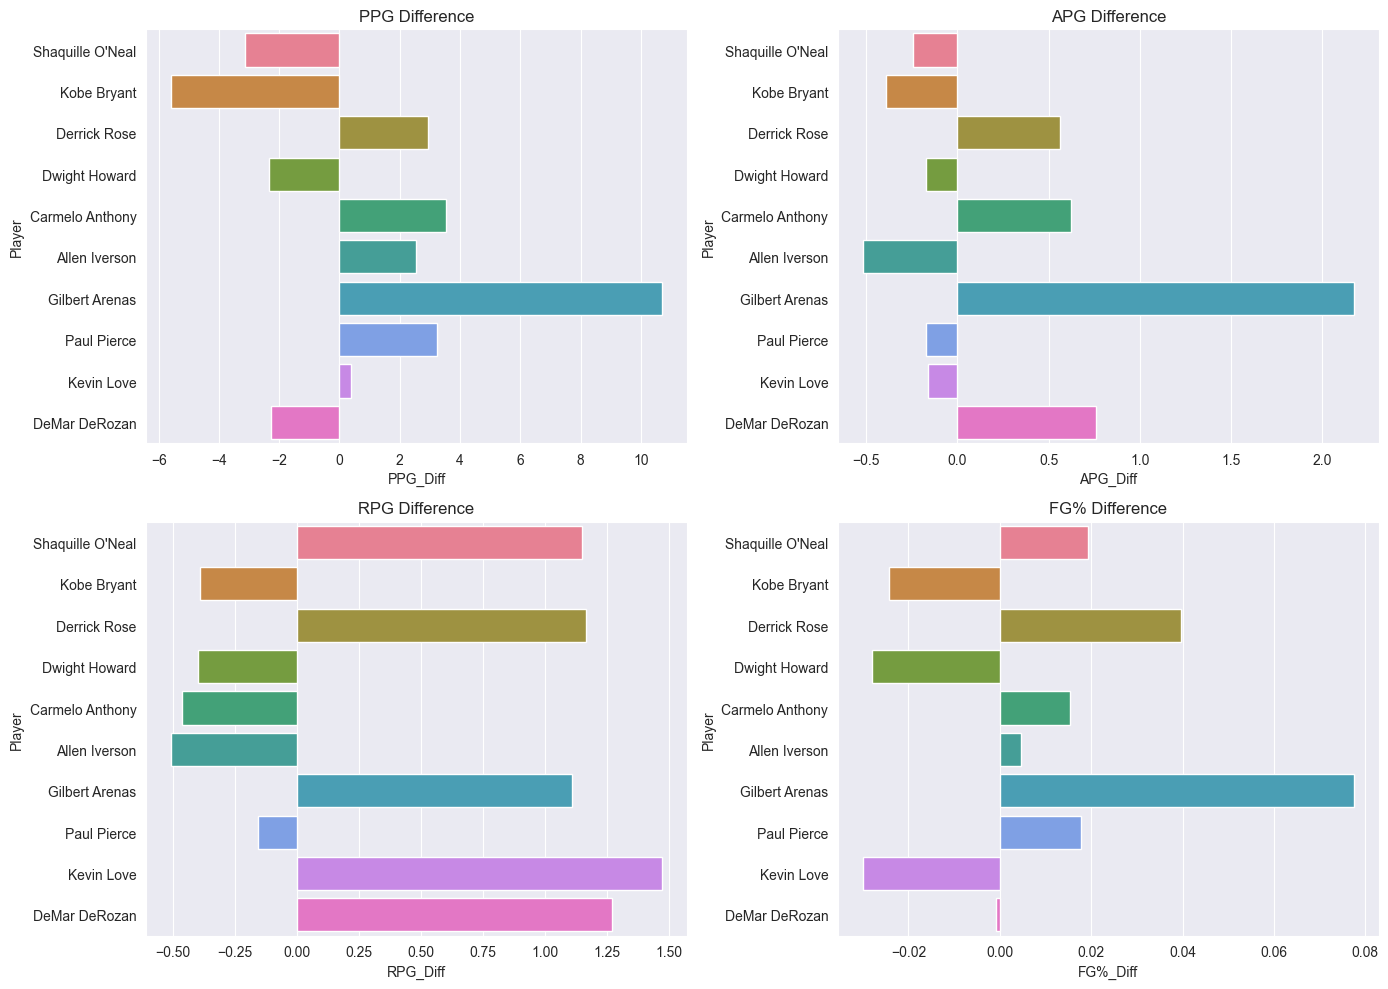

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'comparison_df' is your DataFrame with the players and their differences

# Generate a list of colors, one for each player
players = merged_df['Player'].unique()
palette = sns.color_palette("husl", len(players))

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Assign the 'Player' column to hue to give each player a unique color
# Disable the legend since we're using player names as labels on the y-axis

# Create bar_plot for PPG Difference
sns.barplot(x='PPG_Diff', y='Player', hue='Player', data=merged_df, ax=axes[0, 0], palette=palette, dodge=False, legend=False)
axes[0, 0].set_title('PPG Difference')

# Create bar_plot for APG Difference
sns.barplot(x='APG_Diff', y='Player', hue='Player', data=merged_df, ax=axes[0, 1], palette=palette, dodge=False, legend=False)
axes[0, 1].set_title('APG Difference')

# Create bar_plot for RPG Difference
sns.barplot(x='RPG_Diff', y='Player', hue='Player', data=merged_df, ax=axes[1, 0], palette=palette, dodge=False, legend=False)
axes[1, 0].set_title('RPG Difference')

# Create bar_plot for FG% Difference
sns.barplot(x='FG%_Diff', y='Player', hue='Player', data=merged_df, ax=axes[1, 1], palette=palette, dodge=False, legend=False)
axes[1, 1].set_title('FG% Difference')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### Important Note:
These findings should be interpreted with caution. The differences in performance can be influenced by various factors, including team dynamics, age, injuries, and other personal circumstances.
The data does not establish causation but rather shows correlation. It's challenging to directly attribute changes in on-court performance to specific off-court events without considering all other variables.

<a><img style="float: right;" src="./images/kobe.jpg" width="300" /></a>

#### **Kobe Bryant (2003-04 Season)**
**Off-Court Event**: Kobe was facing serious legal charges.  
**Performance Impact**: There was a noticeable decrease in PPG and FG%.  
**Cautionary Note**: The stress and media scrutiny could have impacted his focus and performance. However, it's essential to consider that the Lakers had significant team changes this season, including new high-profile teammates, which could have altered Kobe's role and subsequently his stats.

reference: https://www.foxla.com/news/kobe-bryant-sexual-assault-case-man-offered-to-kill-accuser-for-3m-in-murder-for-hire-scheme

<a><img style="float: right;" src="./images/arenas.jpg" width="300" /></a>

#### **Gilbert Arenas (2009-10 Season)**
**Off-Court Event**: Gilbert Arenas faced significant legal and personal challenges during the 2009-10 season, most notably involving a locker room incident that led to a lengthy suspension.  
**Performance Impact**: For this season, we observed a substantial increase in both Points Per Game (PPG) and Assists Per Game (APG), as well as a notable increase in Rebounds Per Game (RPG) and Field Goal Percentage (FG%).  
**Cautionary Note**: Prior to the incident and suspension, Arenas was performing at a high level, which contributes to the increased averages.  
Limited Sample Size: Given that he played a limited number of games this season due to the suspension, the averages might not be representative of a full season's performance.  
reference: https://www.complex.com/sports/a/aaron-mansfield/heres-how-gilbert-arenas-javaris-crittendon-gun-incident-really-started

#### Separate into two seasons "before" and two seasons "after" the target season

In [ ]:
# TODO: DO THE ANALYSIS ON THE PROCESSED DATASETS